<a href="https://colab.research.google.com/github/rona11-17/pytorch_tutorial/blob/main/Pytorch1_2_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datasets & Dataloaders

Pytorchにてデータセットを扱う基本要素は以下の2つ
- torch.utils.data.DataLoader
- torch.utils.data.Dataset

Datasetにはサンプルとそれに対応するラベルが格納され、DataLoaderにはいてレート処理が可能なデータが格納される
DataLoaderは、サンプルを簡単に利用できるように、Datasetをいてレート処理可能なものへとラップする。

In [ ]:
%matplotlib inline

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data =datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### データセットの反復処理と可視化

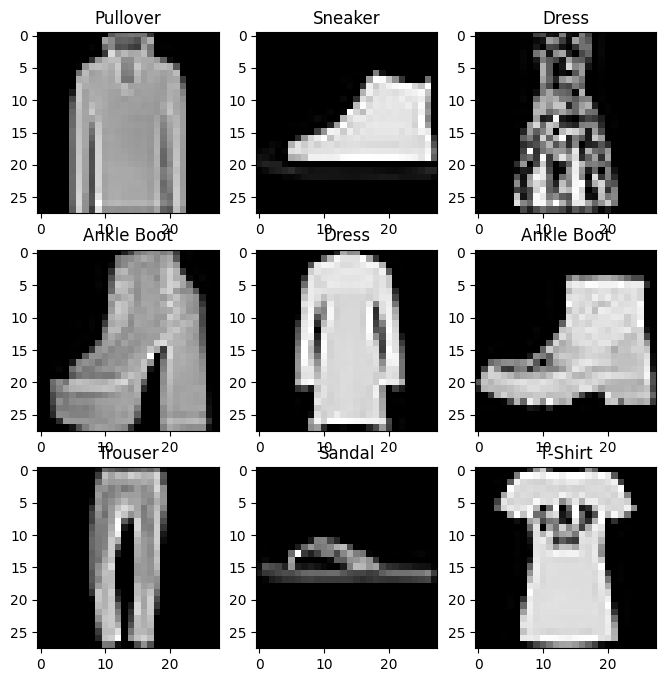

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data),size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.trsform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    imgpath = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(imgpath)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    sample = {"image": image, "label": label}
    return sample



```
# これはコードとして書式設定されます
```

### DataLoaderの使用方法
Datasetを使用することで、1つのサンプルのデータとラベルを取り出せるようになった。
しかし、モデルの訓練時にはミニバッチ単位でデータを扱いたい。
加えてmultiprocessingを使用して複数データの取り出しを高速化したい
DataLoaderは上記に示した複雑な処理を簡単に実行してくれるAPIとなります。

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


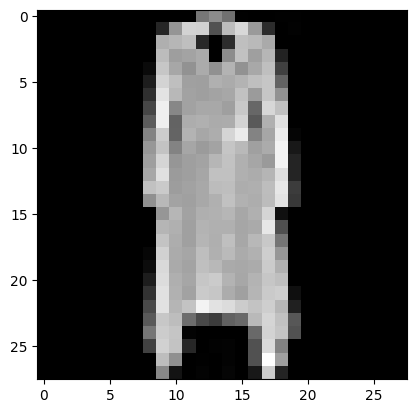

Label:3


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# squeezeは余計な次元の除去
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label:{label}")